# Download Data

# Import .ibw

In [29]:
import os
import SciFiReaders as sr
import glob
import h5py
import pyNSID as nsid

In [15]:
current_dir = os.getcwd()
path = r"TopoForHack/material1_perovksite"
data_path = os.path.join(current_dir, path)
os.chdir(data_path)

In [17]:
#Load the ibw file paths
ibw_files = glob.glob("*.ibw")
ibw_files

['image_2um_01.ibw',
 'image_2um_00.ibw',
 'Image_3um_00.ibw',
 'image_2um_02.ibw',
 'image_1d2um_00.ibw',
 'Image_10um_00.ibw',
 'Image_10um_01.ibw']

In [26]:
#Load all data

for ibw_file in ibw_files:
    reader = sr.IgorIBWReader(ibw_file)
    data = reader.read()
    h5_f = h5py.File(ibw_file[:-4] + '.h5', 'a')
    for key in data.keys():
        h5_c = h5_f.create_group(key)
        nsid.hdf_io.write_nsid_dataset(data[key], h5_c, main_data_name = key)
    h5_f.flush()
    h5_f.close()

/Users/rvv/miniforge3/lib/python3.10/site-packages/pyNSID/io/hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
/Users/rvv/miniforge3/lib/python3.10/site-packages/pyNSID/io/hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
/Users/rvv/miniforge3/lib/python3.10/site-packages/pyNSID/io/hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
/Users/rvv/miniforge3/lib/python3.10/site-packages/pyNSID/io/hdf_utils.py:381: FutureWarning: validate_h5_dimension may be removed in a future version
  warn('validate_h5_dimension may be removed in a future version',
/Users/rvv/miniforge3/lib/python3.10/site-packages/pyNSID/io/hdf_utils.py:381: FutureWarning: validate_h5_dimension may be remov

/Users/rvv/miniforge3/lib/python3.10/site-packages/sidpy/viz/dataset_viz.py:152: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  self.fig = plt.figure(**fig_args)


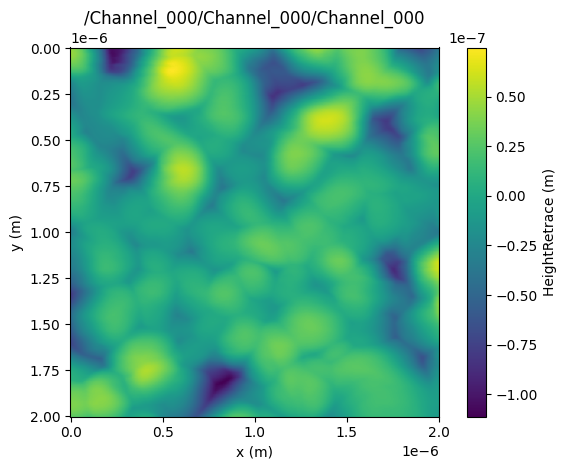

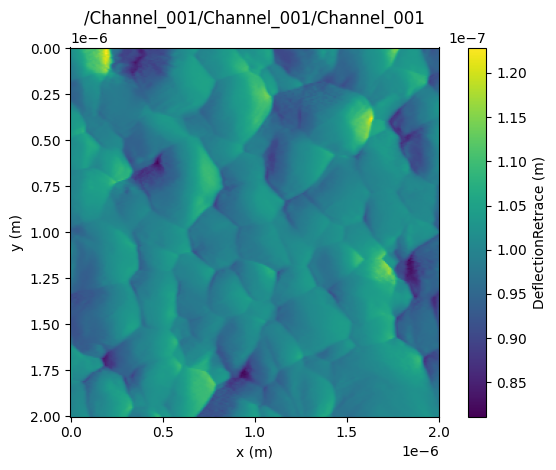

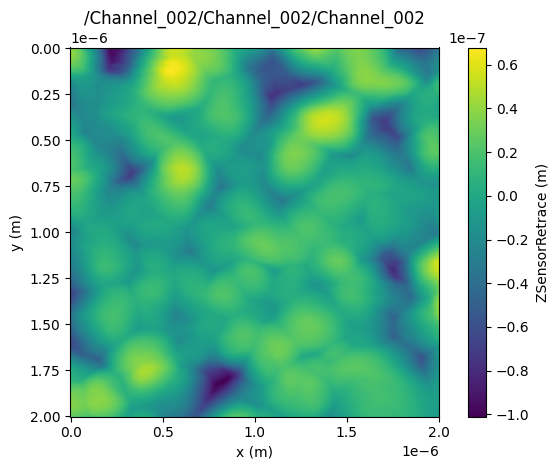

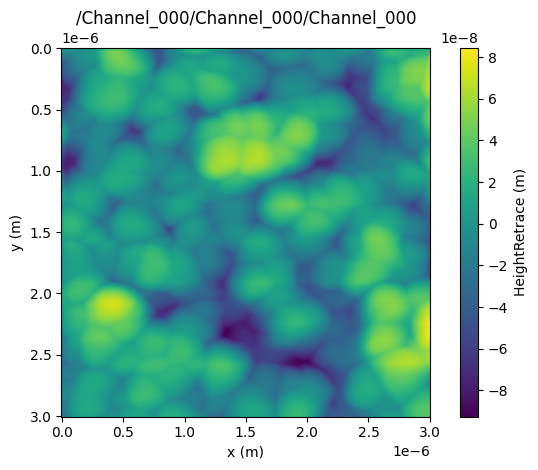

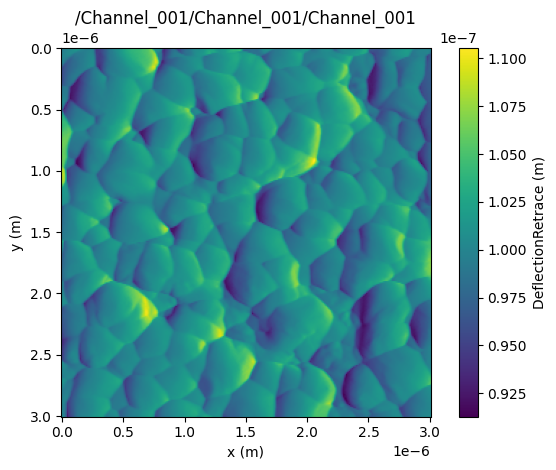

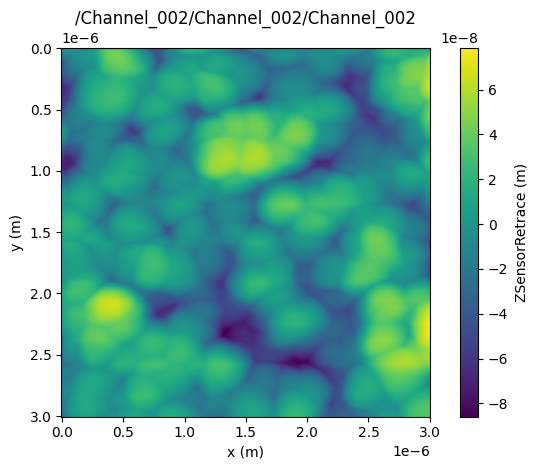

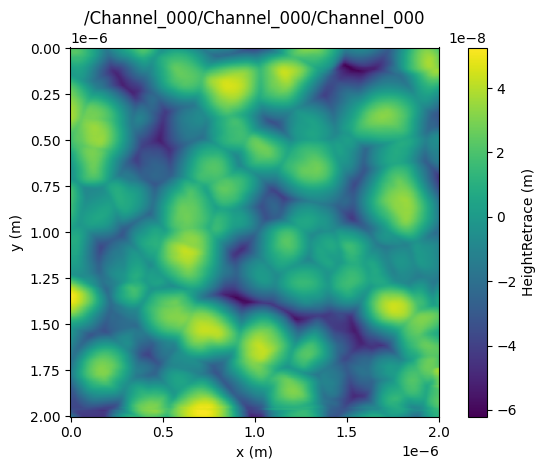

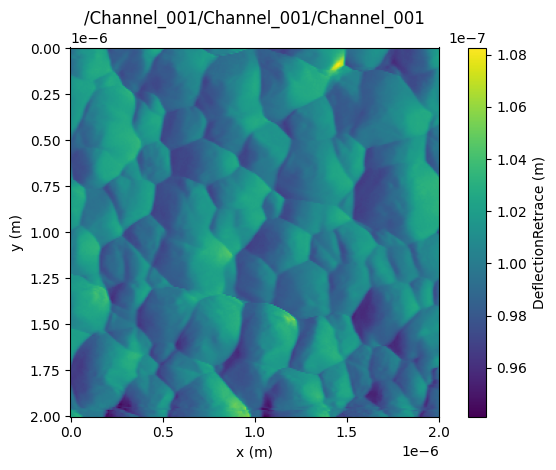

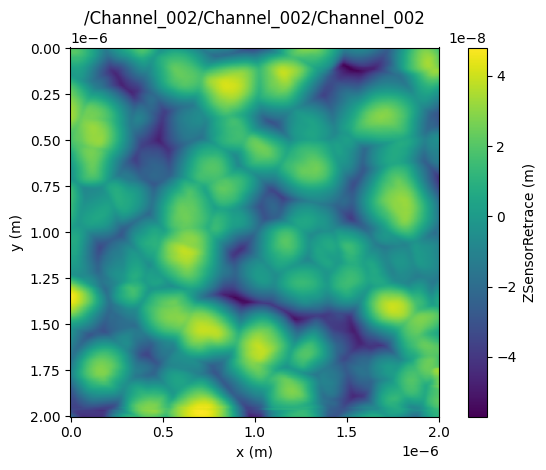

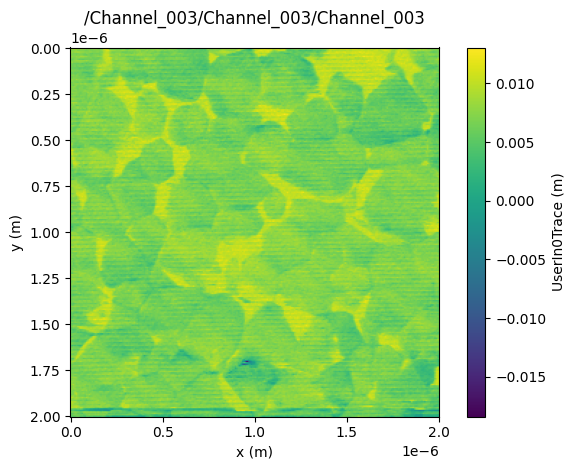

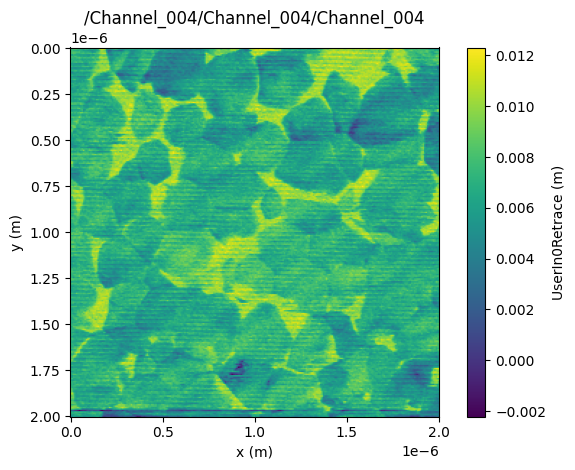

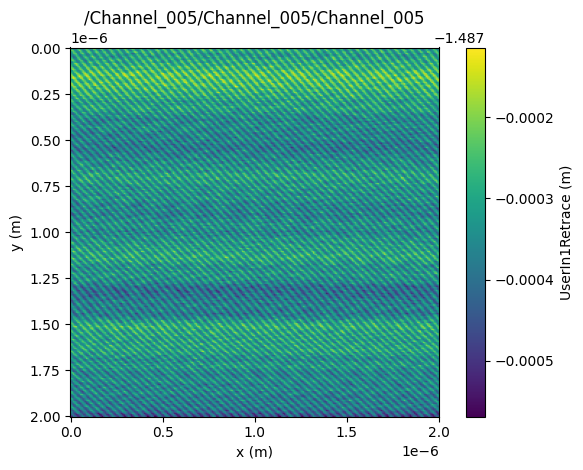

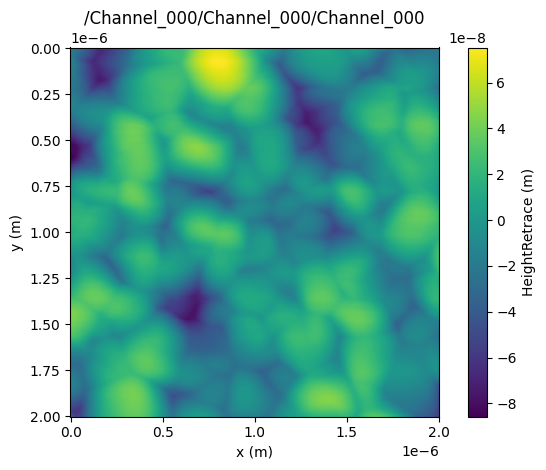

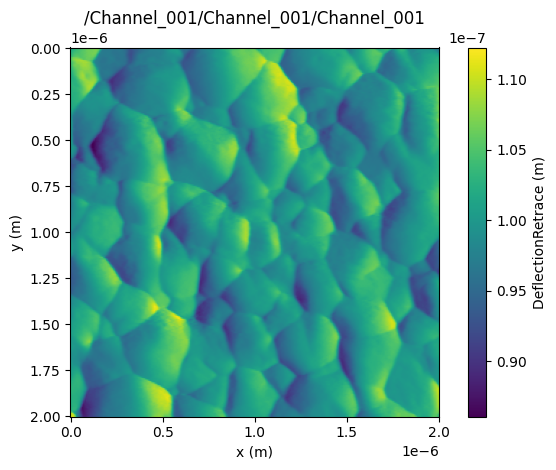

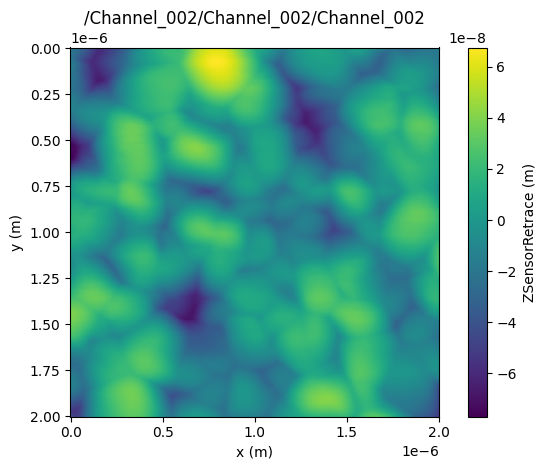

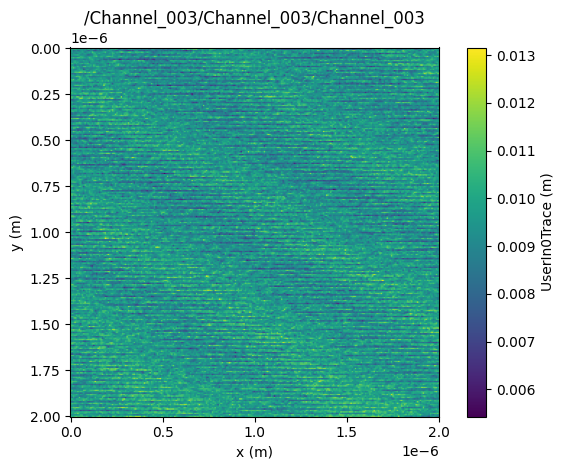

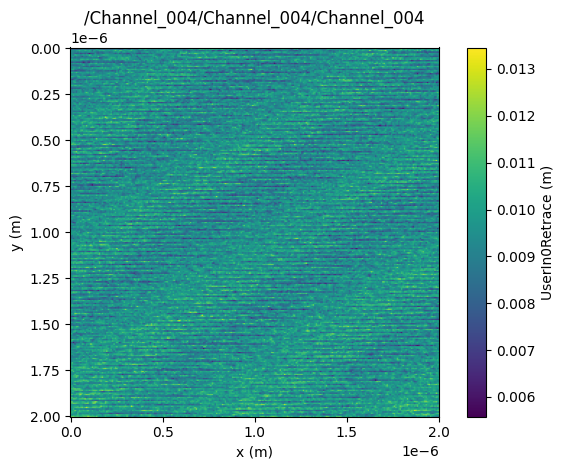

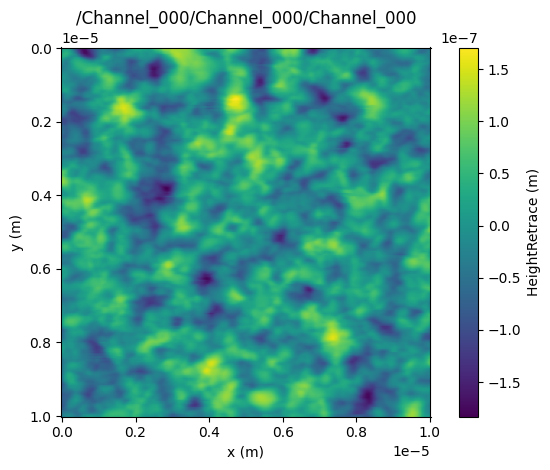

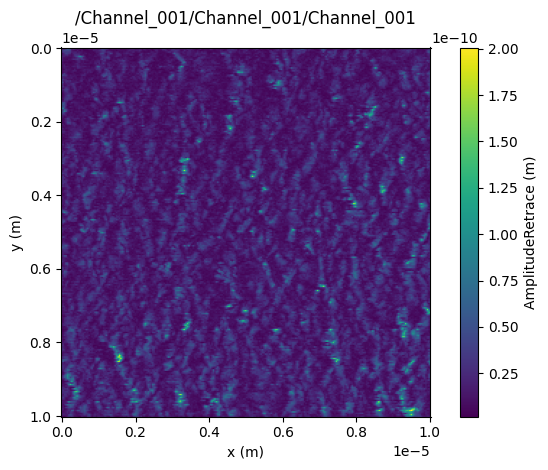

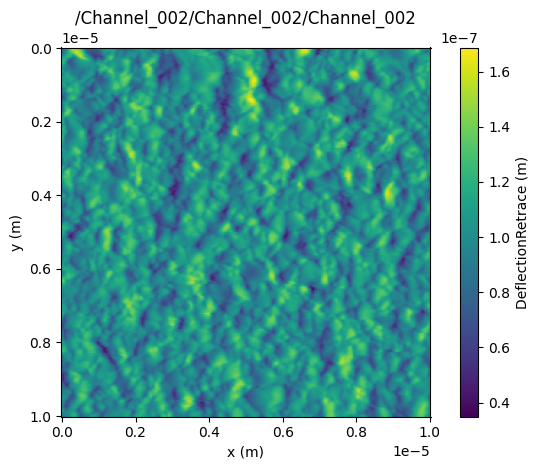

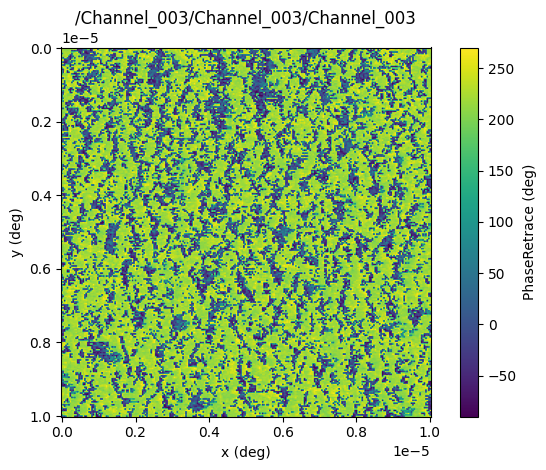

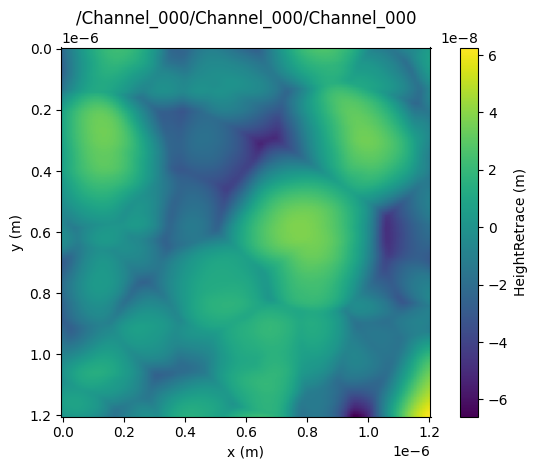

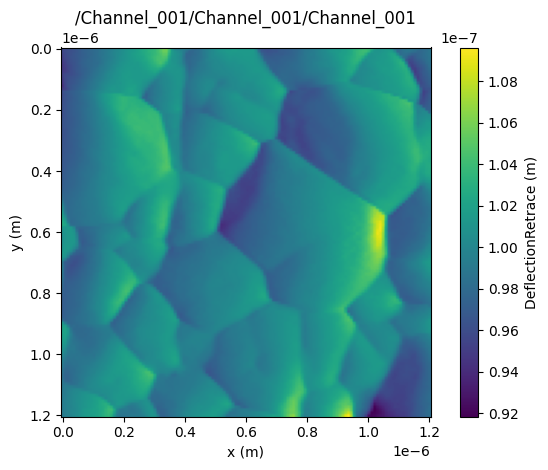

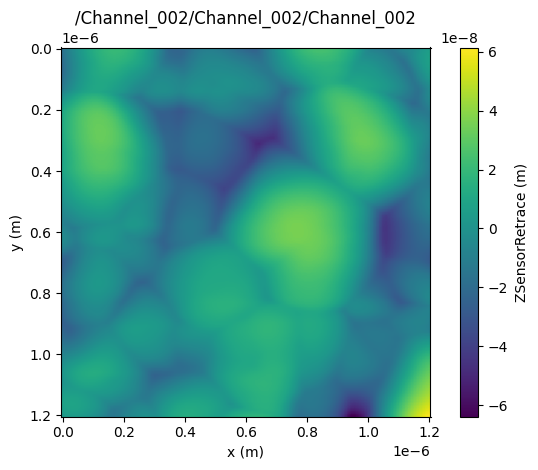

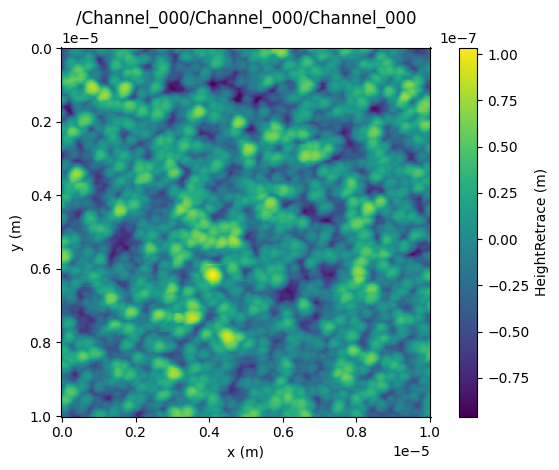

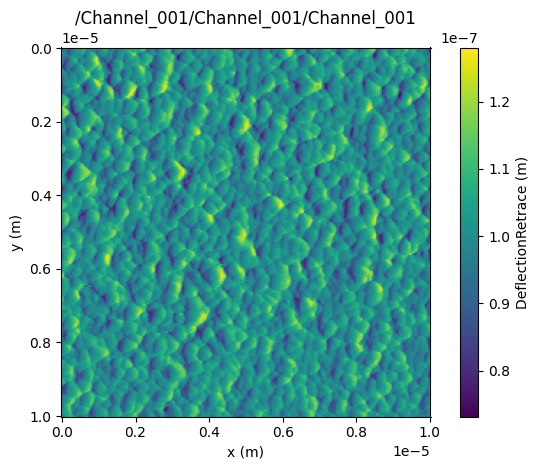

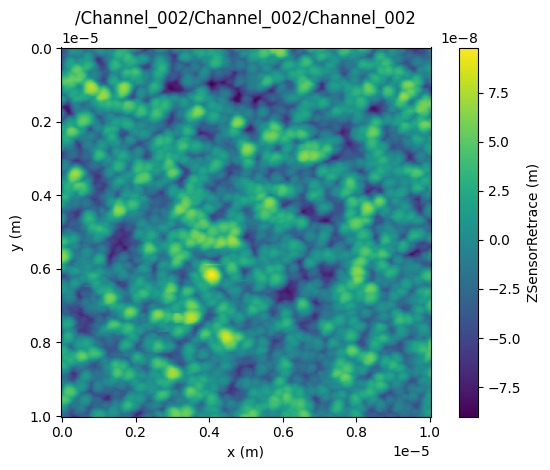

In [31]:
#Load data and plot

h5_files = [fname for fname in os.listdir() if '.h5' in fname]

for file_path in h5_files:
    reader = sr.NSIDReader(file_path)
    data = reader.read()
    for key in data.keys():
        data[key].plot()
    